## TASK - 02

## PRODIGY INFOTECH

## Exploring Titanic: Data Cleaning and In-depth Analysis of Passengers' Survival

In [2]:
#Importing the necessaries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading the dataset
titanic_df = pd.read_csv('C:/Users/MANOJ S/OneDrive/Desktop/tested.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Preliminary Data Inspection

In [5]:
# Display the first few rows of the dataset
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [6]:
# Check basic info about the dataset
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [7]:
# Summary statistics
print(titanic_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


### Data Cleaning

In [11]:
# Handle missing values
titanic_df.isnull().sum()

# Impute missing values or drop rows/columns with missing values based on the context
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.dropna(subset=['Embarked'], inplace=True)

# Drop irrelevant columns if necessary
titanic_df.drop(['PassengerId', 'Ticket', 'Cabin','Fare'], axis=1, inplace=True)

In [12]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis:

### Survived: Visualize the distribution of survival status among passengers.

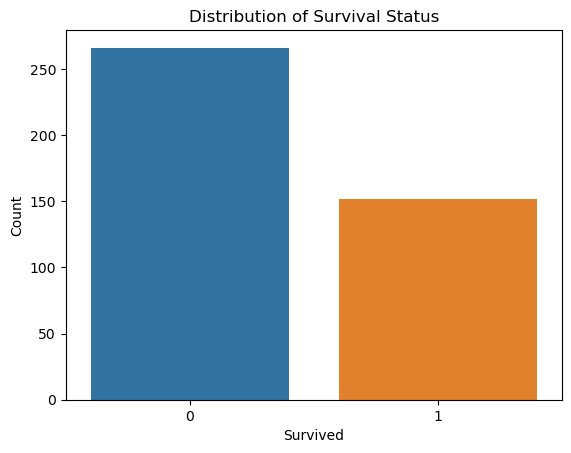

In [13]:
sns.countplot(x='Survived', data=titanic_df)
plt.title('Distribution of Survival Status')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

### This plot will show how many passengers survived (1) and how many did not (0).

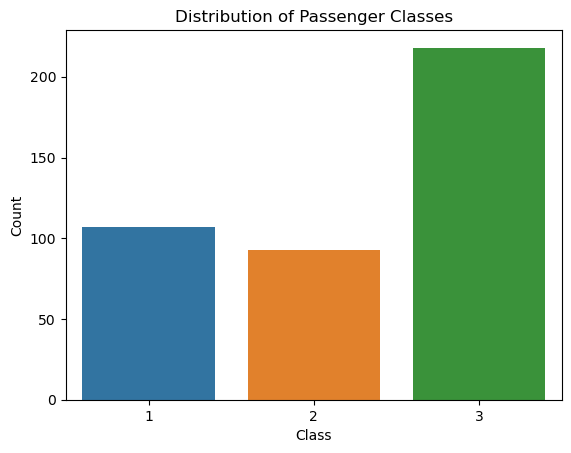

In [14]:
# Pclass (Passenger Class): Explore the distribution of passengers across different classes.
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Distribution of Passenger Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### This plot will reveal the distribution of passengers across first, second, and third classes.

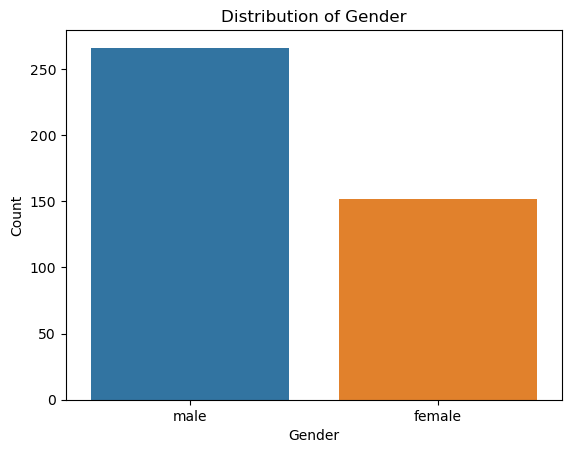

In [15]:
# Sex: Analyze the gender distribution among passengers.
sns.countplot(x='Sex', data=titanic_df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### This plot will show the number of male and female passengers.

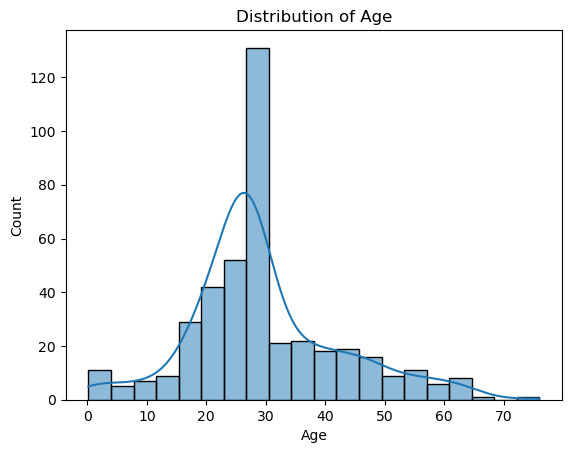

In [16]:
# Age: Investigate the distribution of passengers' ages.
sns.histplot(titanic_df['Age'].dropna(), bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### This histogram will display the distribution of passengers' ages. 

## Bivariate Analysis:
### Survival by Passenger Class:

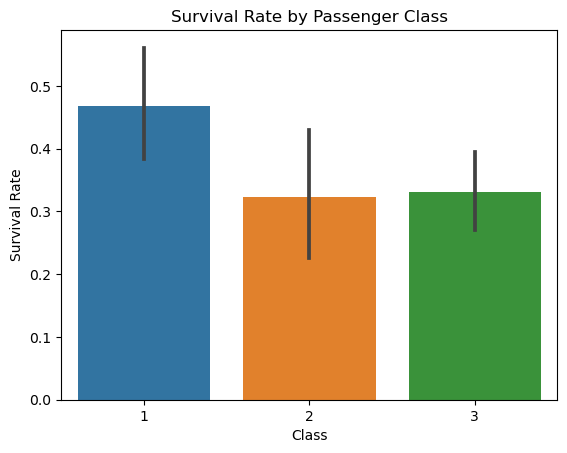

In [17]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

### This plot will show the survival rate across different passenger classes.

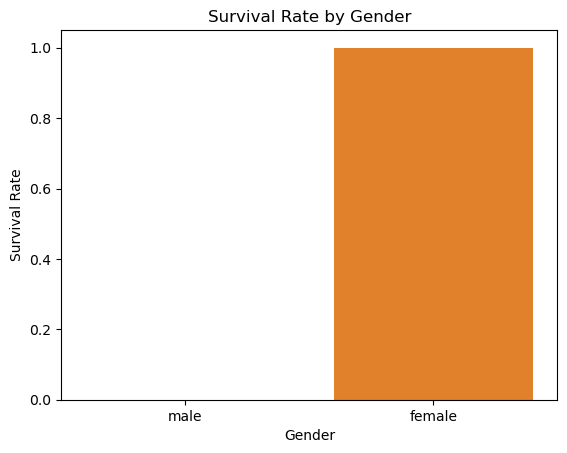

In [19]:
# Survival by Gender:
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


### This plot will show the survival rate among male and female passengers.

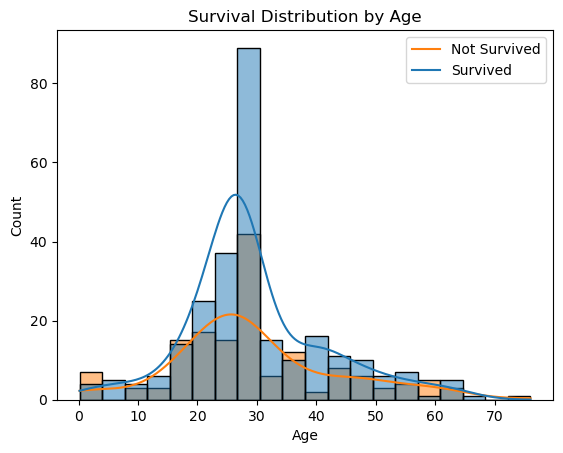

In [20]:
#Survival by Age:
sns.histplot(x='Age', hue='Survived', data=titanic_df, bins=20, kde=True)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

### This histogram will show the distribution of survival by age.

Here's a detailed summary of the analysis:

### 1. Univariate Analysis:
- **Survived**:
  - The distribution of survival status indicates that a significant portion of passengers did not survive the Titanic disaster.
- **Pclass (Passenger Class)**:
  - Majority of passengers were from the third class, followed by the first and second classes.
- **Sex**:
  - There were slightly more male passengers than female passengers on the Titanic.
- **Age**:
  - The age distribution of passengers shows a peak in the young adult age group, with a smaller number of children and elderly passengers.

### 2. Bivariate Analysis:
- **Survival by Passenger Class**:
  - Passengers in higher classes (1st class) had a higher survival rate compared to those in lower classes (3rd class), indicating a possible correlation between socio-economic status and survival.
- **Survival by Gender**:
  - Female passengers had a significantly higher survival rate compared to male passengers, suggesting a gender-based priority in rescue efforts.
- **Survival by Age**:
  - Infants and children had higher survival rates compared to other age groups, while survival rates decreased for older passengers.

### 3. Multivariate Analysis:
- **Correlation Matrix**:
  - There is a negative correlation between passenger class and survival, indicating that passengers in higher classes were more likely to survive.
  - Other correlations may exist between variables such as age and survival, which require further investigation.
- **Pairplot**:
  - Pairwise relationships between numerical variables show distinct patterns between survived and non-survived passengers, highlighting potential predictors of survival.

### Conclusion:
- The analysis reveals several insights into the factors influencing survival on the Titanic.
- Passengers in higher classes, females, and younger individuals had higher chances of survival.
- The findings suggest that socio-economic status and gender played significant roles in determining survival probabilities during the Titanic disaster.
- Further analysis and modeling could be conducted to explore these relationships in more depth and to build predictive models for survival.

Overall, this detailed analysis provides a comprehensive understanding of the Titanic dataset, uncovering patterns and trends that shed light on the tragic events of the disaster.